## 변동훈

### 2021-05-13

In [1]:
import pandas as pd

In [2]:
raw_total = pd.read_excel('./files20200517/3_1_crawling_raw.xlsx')
raw_total['tags'] [:3]

0    ['#제주도맛집', '#애월맛집', '#제주전복', '#제주하복', '#하이엔드제주...
1                                     ['#월정리갈비밥.월정리점']
2    ['#제주카페', '#제주도카페', '#서귀포카페', '#제주맛집', '#제주도맛집...
Name: tags, dtype: object

In [3]:
len(raw_total)

493

In [4]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [7]:
print(tags_list)

['#휴애리', '#여행2일째⠀']


In [8]:
from collections import Counter

In [9]:
tag_counts = Counter(tags_total)

In [10]:
tag_counts.most_common(50)

[('#제주맛집', 162),
 ('#제주여행', 144),
 ('#제주도맛집', 132),
 ('#제주도', 128),
 ('#제주', 124),
 ('#제주관광', 101),
 ('#제주마카롱', 98),
 ('#제주카페', 84),
 ('#제주도여행', 81),
 ('#제주도카페', 80),
 ('', 69),
 ('#월정리맛집', 63),
 ('#제주월정리카페', 56),
 ('#월정리', 56),
 ('#월정리카페', 56),
 ('#제주도마카롱', 54),
 ('#제주시카페', 54),
 ('#월정리콧수염', 52),
 ('#월정리카페콧수염', 52),
 ('#제주월정리', 51),
 ('#서귀포맛집', 46),
 ('#제주도민맛집', 44),
 ('#애월맛집', 39),
 ('#jeju', 37),
 ('#성산일출봉맛집', 35),
 ('#제주맛집', 33),
 ('#서귀포카페', 31),
 ('#성산맛집', 30),
 ('#제주해안도로', 30),
 ('#함덕해수욕장', 29),
 ('#제주도기념품', 28),
 ('#제주여행', 27),
 ('#제주핫플', 27),
 ('#구좌읍맛집', 27),
 ('#제주', 27),
 ('#월정', 26),
 ('#카페무스타치', 26),
 ('#제주가볼만한곳', 25),
 ('#월정리카페거리', 25),
 ('#제주애견동반카페', 25),
 ('#성산카페', 25),
 ('#카페콧수염', 25),
 ('#제주카페추천', 24),
 ('#함덕맛집', 24),
 ('#월정리해변', 24),
 ('#제주도선물', 24),
 ('#제주살이', 24),
 ('#구좌읍', 22),
 ('#세화카페', 22),
 ('#제주카페투어', 21)]

In [11]:
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 162),
 ('#제주여행', 144),
 ('#제주도맛집', 132),
 ('#제주', 124),
 ('#제주관광', 101),
 ('#제주마카롱', 98),
 ('#제주카페', 84),
 ('#제주도여행', 81),
 ('#제주도카페', 80),
 ('', 69),
 ('#월정리맛집', 63),
 ('#제주월정리카페', 56),
 ('#월정리', 56),
 ('#월정리카페', 56),
 ('#제주도마카롱', 54),
 ('#제주시카페', 54),
 ('#월정리콧수염', 52),
 ('#월정리카페콧수염', 52),
 ('#제주월정리', 51),
 ('#서귀포맛집', 46),
 ('#제주도민맛집', 44),
 ('#애월맛집', 39),
 ('#성산일출봉맛집', 35),
 ('#제주맛집', 33),
 ('#서귀포카페', 31),
 ('#성산맛집', 30),
 ('#제주해안도로', 30),
 ('#함덕해수욕장', 29),
 ('#제주도기념품', 28),
 ('#제주여행', 27),
 ('#제주핫플', 27),
 ('#구좌읍맛집', 27),
 ('#제주', 27),
 ('#월정', 26),
 ('#카페무스타치', 26),
 ('#제주가볼만한곳', 25),
 ('#월정리카페거리', 25),
 ('#제주애견동반카페', 25),
 ('#성산카페', 25),
 ('#카페콧수염', 25),
 ('#제주카페추천', 24),
 ('#함덕맛집', 24),
 ('#월정리해변', 24),
 ('#제주도선물', 24),
 ('#제주살이', 24),
 ('#구좌읍', 22),
 ('#세화카페', 22),
 ('#제주카페투어', 21),
 ('#제주피크닉', 21),
 ('#제주천국의계단', 21)]

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

In [15]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

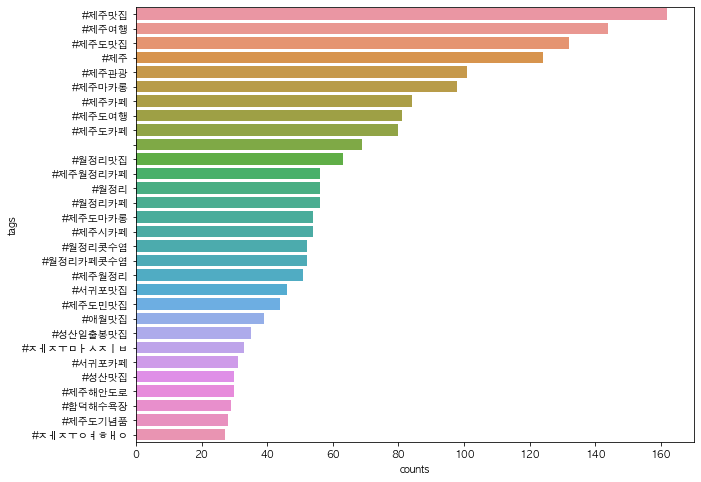

In [16]:
plt.figure(figsize=(10,8)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

In [18]:
from wordcloud import WordCloud
import platform

In [19]:
if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

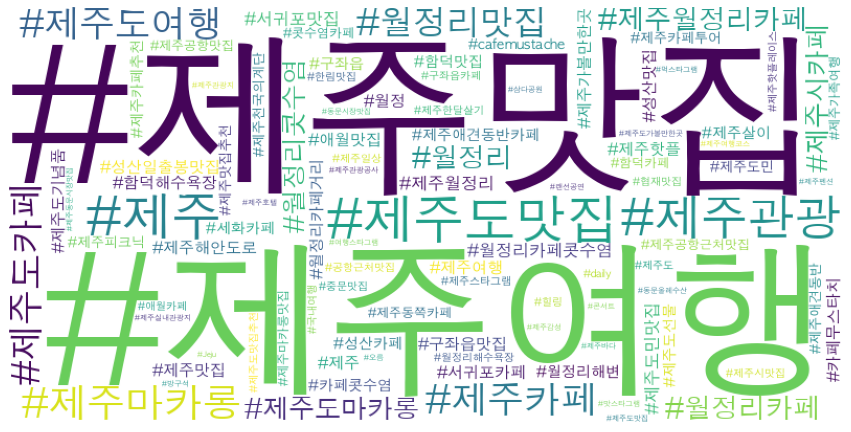

In [20]:
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files20200517/3_2_tag-wordcloud.png') 

In [21]:
raw_total = pd.read_excel('./files20200517/3_1_crawling_raw.xlsx')
raw_total.head()

,content,data,like,place,tags
0,제주하복''의 야심작 꼬막대판 ☀️☀️☀️신메뉴출시☀️☀️☀️꼬막의고장 벌교에...,2020-05-17,"2,183",NaN,"['#제주도맛집', '#애월맛집', '#제주전복', '#제주하복', '#하이엔드제주..."
1,".위 사진은 실제 제공하는 음식과다를 수 ‘없’습니다..월정리점 , 서귀포점당당하게...",2020-05-16,"1,325",월정리갈비밥 서귀포점,['#월정리갈비밥.월정리점']
2,수마카페 시그니처 메뉴'브라운헤이즈' 갈색 안개 같은 라떼 위에 아몬드 크림이 올라...,2020-05-16,"1,382",NaN,"['#제주카페', '#제주도카페', '#서귀포카페', '#제주맛집', '#제주도맛집..."
3,제주도여행중 기억에 남는 맛집‼️망고아ᄋ...,2020-05-15,"1,281",할로비치,"['#제주카페', '#제주도카페', '#제주도맛집', '#제주맛집', '#제주카페추..."
4,.세상의 잣대로자신의 행복을 평가하지 마셔요..당신은 오늘꽤 근사한 행복한 하루를 ...,2020-05-17,"1,246",월정리갈비밥 서귀포점,['#월정리갈비밥.월정리점']


In [22]:
location_counts = raw_total['place'].value_counts( )
location_counts

Jeju                        14
Jeju-do                      8
제주 협재 해수욕장                   6
Seogwipo                     4
새별오름                         4
                            ..
하루비커피                        1
제주시차                         1
앞뱅디식당                        1
제주 가파도                       1
빛의 벙커 Bunker de Lumières     1
Name: place, Length: 134, dtype: int64

In [23]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

,place
Jeju,14
Jeju-do,8
제주 협재 해수욕장,6
Seogwipo,4
새별오름,4


In [24]:
location_counts_df.to_excel('./files20200517/3_3_location_counts.xlsx')

In [25]:
locations = list( location_counts.index )
locations

['Jeju',
 'Jeju-do',
 '제주 협재 해수욕장',
 'Seogwipo',
 '새별오름',
 '제주도 애월읍',
 'Umu Pudding , 우무',
 '제주도, Jeju',
 '제주 나홀로나무',
 '제주귀더크',
 '섭지코지 (Seopjikoji)',
 '전농로',
 '사이카레',
 '월정리갈비밥 서귀포점',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '제주한달살기 제주월가',
 '송악산 둘레길',
 '영국찻집',
 '도민상회',
 '할로비치',
 '선흘곶',
 '휴애리 자연생활공원',
 '쇠소깍',
 '제주도 곽지해수욕장',
 '청춘부부',
 '안돌오름',
 '카페동백',
 '제주연구원',
 '제주도 해안도로',
 '푸른섬 제주도',
 '가문동길펜션',
 '서광춘희',
 '영실국수',
 '애월하미',
 '테디스오',
 '협재해변',
 '버거스테이',
 '우드노트',
 '제주대학교정문',
 '그리울땐 제주',
 'Ulsan, Korea',
 '안녕협재씨',
 '날외일오naloe 15',
 '삼대국수회관',
 '제주항',
 '환상의 섬 Jeju Island',
 '선흘리 동백동산',
 '명리동식당',
 '금능해수욕장',
 'Cocomong Eco Park',
 '제주승마공원',
 'Nasillonner_나지요네',
 '반딧불 한담',
 '그계절',
 '연예인반점',
 '식당 마요네즈',
 '블루사이공',
 '제주 함덕 서우봉 해변',
 'Landingcoffee',
 '카페소금',
 'JIVAL',
 '광주공항',
 'Gimpo International Airport - 金浦国际机场 - 김포공항',
 '대평리',
 '루페이퍼 Rupaper',
 '바바센트 - Vava Scent',
 'Terarosa - 테라로사',
 '밀꾸루시',
 '제스토리 제주감성소품',
 '동백포레스트',
 '9.81 PARK',
 '제주실탄사격장',
 '원보뷔페',
 '한림해안도로',
 '남원 큰엉해안',
 '미남미녀',
 '가파도',
 '가시리

In [27]:
import requests

searching = '합정 스타벅스'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)

headers = {
    "Authorization": "KakaoAK 5e96943c943636b37f24cd5c657d92b3"     
    # 입력시 반드시  KakaoAK 뒤에 한 칸 띄우고 API키 값을 적어야 합니다. 
}

places = requests.get(url, headers = headers).json()['documents']
places

[{'address_name': '서울 마포구 서교동 395-166',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '26572121',
  'phone': '',
  'place_name': '스타벅스 서교점',
  'place_url': 'http://place.map.kakao.com/26572121',
  'road_address_name': '서울 마포구 양화로 78',
  'x': '126.916980454434',
  'y': '37.5514601750423'},
 {'address_name': '서울 마포구 합정동 472',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '2057327896',
  'phone': '1522-3232',
  'place_name': '스타벅스 합정점',
  'place_url': 'http://place.map.kakao.com/2057327896',
  'road_address_name': '서울 마포구 월드컵로1길 14',
  'x': '126.91253700818196',
  'y': '37.54994959743763'},
 {'address_name': '서울 마포구 서교동 490',
  'category_group_code': 'CE7',
  'category_group_name': '카페',
  'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
  'distance': '',
  'id': '288597324',
  'phone': '',
  'place_name': '스타벅스 합정폴리스R

In [28]:
def find_places(searching):
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    
    headers = {
    "Authorization": "KakaoAK 5e96943c943636b37f24cd5c657d92b3"
    }
    
    places = requests.get(url, headers = headers).json()['documents']
    
    place = places[0] 
    name = place['place_name']
    x=place['x']
    y=place['y']
    data = [name, x, y, searching] 

    return data

In [29]:
data = find_places('제주공항')
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

In [31]:
from tqdm import tqdm_notebook

In [32]:
import time
locations_inform = [ ]
for location in tqdm_notebook(locations):
    try:
        data = find_places(location)       
        locations_inform.append(data) 
        time.sleep(0.5) 
    except:
        pass
locations_inform

<ipython-input-32-e95a8706cd2f>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location in tqdm_notebook(locations):


  0%|          | 0/134 [00:00<?, ?it/s]

[['Jeju in aA', '126.83650369902168', '33.53833652360498', 'Jeju'],
 ['협재해수욕장', '126.239157539085', '33.3938660776221', '제주 협재 해수욕장'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['새별오름', '126.357711941768', '33.3661936453469', '새별오름'],
 ['올레길 17코스(광령-제주원도심 올레)', '126.439341083568', '33.4608856490895', '제주도 애월읍'],
 ['Jeju in aA', '126.83650369902168', '33.53833652360498', '제주도, Jeju'],
 ['새별오름 나홀로나무', '126.3498885723', '33.350735531562', '제주 나홀로나무'],
 ['귀더크', '126.28242079859567', '33.44227311235779', '제주귀더크'],
 ['섭지코지', '126.930609241011', '33.4239380655993', '섭지코지 (Seopjikoji)'],
 ['KT플라자 제주점', '126.525120145472', '33.5040263706471', '전농로'],
 ['사이카레', '126.381106668339', '33.4842446359284', '사이카레'],
 ['월정리갈비밥 서귀포점', '126.279401574275', '33.2771723978877', '월정리갈비밥 서귀포점'],
 ['송악산둘레길', '126.293075154019', '33.1968232389213', '송악산 둘레길'],
 ['영국찻집', '126.314112546652', '33.4172313997298', '영국찻집'],
 ['도민상회', '126.26020639649', '33.4131899711544', '도민상회'],
 ['할로비치', '12

In [33]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_official','경도','위도','인스타위치명']
locations_inform_df.to_excel('./files20200517/3_3_locations.xlsx', index=False)

In [36]:
locations_inform_df.head()

,name_official,경도,위도,인스타위치명
0,Jeju in aA,126.836504,33.538337,Jeju
1,협재해수욕장,126.239158,33.393866,제주 협재 해수욕장
2,서귀포잠수함,126.558616,33.239303,Seogwipo
3,새별오름,126.357712,33.366194,새별오름
4,올레길 17코스(광령-제주원도심 올레),126.439341,33.460886,제주도 애월읍


In [34]:
location_counts_df = pd.read_excel('./files20200517/3_3_location_counts.xlsx', index_col = 0)
locations_inform_df = pd.read_excel('./files20200517/3_3_locations.xlsx')

In [37]:
location_counts_df.head()

,place
Jeju,14
Jeju-do,8
제주 협재 해수욕장,6
Seogwipo,4
새별오름,4


In [38]:
location_data = pd.merge(locations_inform_df, location_counts_df, 
                         how = 'inner', left_on = 'name_official', right_index=True)

location_data.head()

,name_official,경도,위도,인스타위치명,place
3,새별오름,126.357712,33.366194,새별오름,4
10,사이카레,126.381107,33.484245,사이카레,2
11,월정리갈비밥 서귀포점,126.279402,33.277172,월정리갈비밥 서귀포점,2
13,영국찻집,126.314113,33.417231,영국찻집,2
14,도민상회,126.260206,33.413190,도민상회,2


In [40]:
location_data['name_official'].value_counts()

함덕해수욕장         2
가파도            2
제주항            1
제주시차           1
하루비커피          1
범일분식           1
봉쟈블루스          1
하늘아래 게스트하우스    1
카페소금           1
광주공항           1
월정리갈비밥 서귀포점    1
바나나민박          1
카페도두           1
화조원            1
안녕협재씨          1
블루사이공          1
도토리키친          1
연예인반점          1
청춘부부           1
할로비치           1
선흘곶            1
새별오름           1
금능해수욕장         1
용머리해안          1
명리동식당          1
앞뱅디식당          1
항파두리 항몽유적지     1
그계절            1
사이카레           1
마키산도           1
동백포레스트         1
다니쉬            1
도민상회           1
애월더선셋          1
버거스테이          1
우드노트           1
월정스캔들          1
영실국수           1
테디스오           1
미남미녀           1
애월하미           1
서광춘희           1
쇠소깍            1
제주연구원          1
이태리너랑같이제주      1
제주실탄사격장        1
안돌오름           1
영국찻집           1
가문동길펜션         1
멜톤             1
Name: name_official, dtype: int64

In [41]:
location_data = location_data.pivot_table(
    index = ['name_official','경도','위도'], 
    values = 'place', 
    aggfunc='sum')
location_data.head()

,,,place
name_official,경도,위도,
가문동길펜션,126.392688,33.481182,1
가파도,126.271410,33.170012,2
광주공항,126.810980,35.140181,1
그계절,126.818531,33.531859,1
금능해수욕장,126.235890,33.390449,1


In [42]:
location_data.to_excel('./files20200517/3_3_location_inform.xlsx')

In [43]:
location_data = pd.read_excel('./files20200517/3_3_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_official  50 non-null     object 
 1   경도             50 non-null     float64
 2   위도             50 non-null     float64
 3   place          50 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [49]:
import folium

Mt_Hanla =[33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

for i in range(len(location_data)):
    name = location_data ['name_official'][i]    # 공식명칭
    count = location_data ['place'][i]           # 게시글 개수
    size = int(count)*2
    long = float(location_data['위도'][i])      
    lat = float(location_data['경도'][i])       
    folium.CircleMarker((long,lat), radius = size, color='red', popup=name).add_to(map_jeju)
    
map_jeju

In [46]:
map_jeju.save('./files20200517/3_3_jeju.html') 

In [50]:
from folium.plugins import MarkerCluster

locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]  # 행 하나씩
    locations.append((float(data['위도']),float(data['경도'])))    # 위도 , 경도 순으로..
    names.append(data['name_official'])

Mt_Hanla =[33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)
                       
marker_cluster = MarkerCluster(
    locations=locations, popups=names,
    name='Jeju',
    overlay=True,
    control=True,
)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [48]:
map_jeju2.save('./files20200517/3_3_jeju_cluster.html') 